In [1]:
import pandas as pd
import numpy as np


In [57]:
df1 = pd.read_excel("Analytics_All_Web_Site_Data_AdWords_Search_Queries_20170615-20180302.xlsx",sheet_name="Dataset1")

In [58]:
df2 = pd.read_excel("Analytics_All_Web_Site_Data_AdWords_Search_Queries_20170615-20180302_(1).xlsx",sheet_name="Dataset1")

In [59]:
# remove last row of summary statistics
df1 = df1.iloc[:-1]
df2 = df2.iloc[:-1]

In [61]:
df = df1.append(df2).reset_index().drop('index',axis=1)

In [63]:
df['Revenue/Session'] = df.Revenue /df.Sessions
df = df.dropna() # drop NaN values for Revenue/Session i.e. where Revenue is 0, affect 131 of 8000 rows

In [71]:
df2 = df[['Revenue/Session',"Pages / Session","Bounce Rate","Clicks",'Search Query']] # rearrange and select columns

In [72]:
df2.head()

,Revenue/Session,Pages / Session,Bounce Rate,Clicks,Search Query
0,0.603074,6.585437,0.338739,23784,lovers lane
1,1.389565,8.804831,0.220156,11623,adam and eve
2,0.453256,4.576353,0.419328,11432,cock rings
3,0.357102,6.884110,0.334280,11255,lions den
4,0.714204,9.120308,0.178673,10769,sex toys


In [77]:
X = df2.iloc[:,1:-1]  # Select Pages/sesion, Bounce Rate, Clicks
X = df2.iloc[:,1:-2]  # Select Pages/sesion, Bounce Rate

In [81]:
X = X.values

In [82]:
y = df2.iloc[:,:1]

In [83]:
Y = y.values

In [84]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [85]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
y_pred = regressor.predict(X_test)

In [87]:
y_pred = pd.DataFrame(y_pred)

In [88]:
# y_pred = y_pred[0]

In [89]:
# y_test = y_test['Revenue/Session']

In [90]:
y_pred.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [91]:
result = pd.concat([y_test,y_pred],axis=1)

In [92]:
import matplotlib
%matplotlib inline  

In [93]:
result.head(100)

,Revenue/Session,0
0,0.000000,-0.316284
1,3.229836,1.452331
2,1.871233,1.888460
3,0.000000,3.427140
4,0.000000,-0.448787
5,0.000000,-0.050654
6,0.715323,1.372473
7,0.000000,1.239778
8,0.409010,0.850829
9,0.490726,1.719164


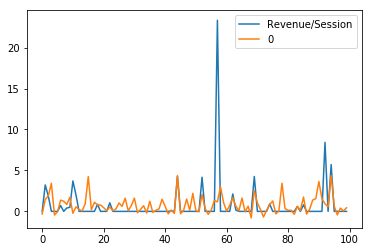

In [94]:
result.head(100).plot()